In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!git clone 'https://github.com/shadabsk/Sign-Language-Recognition-Using-Hand-Gestures-Keras-PyQT5-OpenCV'

Cloning into 'Sign-Language-Recognition-Using-Hand-Gestures-Keras-PyQT5-OpenCV'...
remote: Enumerating objects: 52679, done.
remote: Counting objects: 100% (52088/52088), done.
remote: Compressing objects: 100% (52080/52080), done.
remote: Total 52679 (delta 9), reused 52080 (delta 8), pack-reused 591
Receiving objects: 100% (52679/52679), 86.34 MiB | 9.19 MiB/s, done.
Resolving deltas: 100% (184/184), done.
Checking out files: 100% (52086/52086), done.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

import tensorflow as tf

import cv2
import os

import numpy as np

In [ ]:
DATADIRTRAIN="/content/Sign-Language-Recognition-Using-Hand-Gestures-Keras-PyQT5-OpenCV/Source Code/Dataset/training_set"
DATADIRVALID='/content/Sign-Language-Recognition-Using-Hand-Gestures-Keras-PyQT5-OpenCV/Source Code/Dataset/test_set'

In [ ]:
train=ImageDataGenerator(rescale=1/255,shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
valid=ImageDataGenerator(rescale=1/255)

In [ ]:
train= train.flow_from_directory(
       DATADIRTRAIN ,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

valid = valid.flow_from_directory(
        DATADIRVALID,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 45500 images belonging to 26 classes.
Found 6500 images belonging to 26 classes.


In [ ]:
train.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='tanh'))

model.add(Dense(26, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        3

In [ ]:
from keras import optimizers
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
model.fit(train,epochs=10,batch_size=32, validation_data = valid,callbacks=[early_stop])

Epoch 1/10
1422/1422 [==============================] - 271s 180ms/step - loss: 0.7025 - accuracy: 0.7966 - val_loss: 0.1140 - val_accuracy: 0.9717
Epoch 2/10
1422/1422 [==============================] - 253s 178ms/step - loss: 0.0830 - accuracy: 0.9777 - val_loss: 0.0568 - val_accuracy: 0.9880
Epoch 3/10
1422/1422 [==============================] - 253s 178ms/step - loss: 0.0500 - accuracy: 0.9874 - val_loss: 0.0649 - val_accuracy: 0.9800
Epoch 4/10
1422/1422 [==============================] - 252s 177ms/step - loss: 0.0497 - accuracy: 0.9865 - val_loss: 0.0820 - val_accuracy: 0.9854
Epoch 5/10
1422/1422 [==============================] - 254s 179ms/step - loss: 0.0504 - accuracy: 0.9853 - val_loss: 0.0764 - val_accuracy: 0.9846


In [ ]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,0.312872,0.911077,0.113986,0.971692
1,0.074287,0.979560,0.056758,0.988000
2,0.048745,0.987099,0.064940,0.980000
3,0.048987,0.986374,0.082036,0.985385
4,0.051110,0.984857,0.076391,0.984615


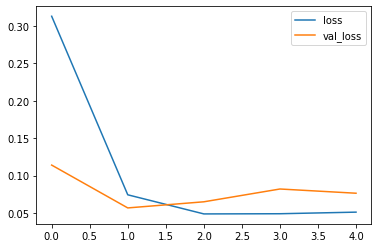

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

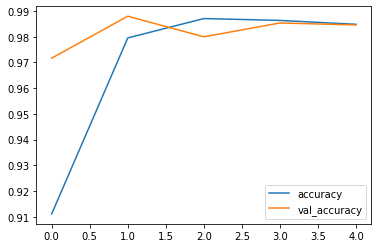

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Jcomp/Final_tanh.h5')